# Puerto Rico Real Estate Analysis and Linear Regression
The objective of this project is to perform some Exploratory Data Analysis on real estate in Puerto Rico and then use a linear regression model to predict a house price based on the #1 determining factor based on our dataset analysis. My hypothesis is that square footage will provide the best estimate of price but we will test on other factors as well for a more thorough analysis.

In [86]:
#Lets first import our libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [87]:
df = pd.read_csv('realtor-data.csv')
df.head()
#Link to dataset: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?select=realtor-data.zip.csv

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


## Pre-processing our data

In [88]:
#List the unique states in the states column
df['state'].unique().tolist()

['Puerto Rico',
 'Virgin Islands',
 'Massachusetts',
 'Connecticut',
 'New Hampshire',
 'Vermont',
 'New Jersey',
 'New York',
 'South Carolina',
 'Tennessee',
 'Rhode Island',
 'Virginia',
 'Wyoming',
 'Maine',
 'Georgia',
 'Pennsylvania',
 'West Virginia',
 'Delaware',
 'Louisiana',
 'Ohio',
 'California',
 'Colorado',
 'Maryland',
 'Missouri',
 'District of Columbia',
 'Wisconsin',
 'North Carolina',
 'Kentucky',
 'Michigan',
 'Mississippi',
 'Florida',
 'Alabama',
 'New Brunswick',
 nan,
 'Texas',
 'Arkansas',
 'Idaho',
 'Indiana',
 'Illinois',
 'New Mexico',
 'Iowa',
 'Minnesota',
 'South Dakota',
 'Nebraska',
 'North Dakota',
 'Montana',
 'Oklahoma',
 'Kansas',
 'Oregon',
 'Utah',
 'Nevada',
 'Washington',
 'Arizona',
 'Hawaii',
 'Guam',
 'Alaska']

In [89]:
#There's a lot of real estate included in states other than Puerto Rico... so lets narrow it down to just Puerto Rico Real estate
df = df[df['state'] == 'Puerto Rico']
#List the unique states in the states column again to double check
df['state'].unique().tolist()

['Puerto Rico']

In [90]:
#Let's narrow down our dataset to include only the columns we want to perform EDA on.
df = df[['price','bed','bath','acre_lot','city','house_size']]
df.head()

,price,bed,bath,acre_lot,city,house_size
0,105000.0,3.0,2.0,0.12,Adjuntas,920.0
1,80000.0,4.0,2.0,0.08,Adjuntas,1527.0
2,67000.0,2.0,1.0,0.15,Juana Diaz,748.0
3,145000.0,4.0,2.0,0.10,Ponce,1800.0
4,65000.0,6.0,2.0,0.05,Mayaguez,NaN


In [91]:
df.isnull().sum()

price           0
bed           582
bath          567
acre_lot      692
city            0
house_size    627
dtype: int64

In [92]:
#This is quite a few missing entries. Lets check the total number of rows in our dataset before dropping all of them.
len(df)

3126

In [93]:
#We have another 2000 or so entries to build our model and explore with so lets go ahead and drop our entries.
df.dropna(inplace=True)
#df.isnull().sum()

In [94]:
#Check for duplicates now
df.duplicated().sum()

np.int64(26)

In [95]:
#Drop Duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis
The goal is to inspect which variables in our dataset predict housing price the most even if there is only a loose correlation.

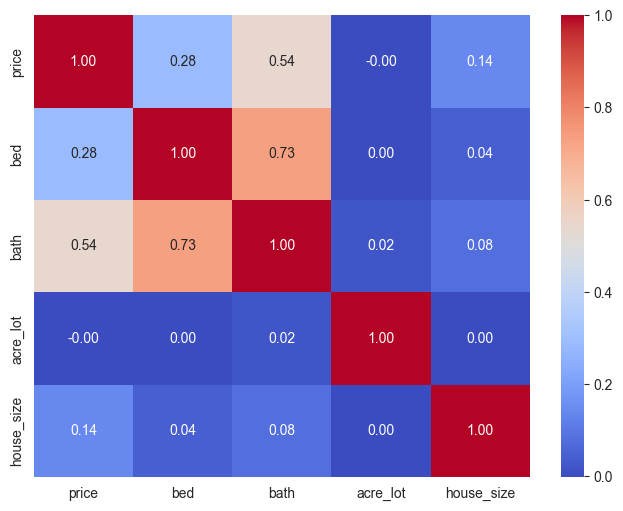

In [96]:
#Lets first make a heatmap with all of our numeric variables to see the correlation
numeric_cols = ['price','bed','bath','acre_lot','house_size']

corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap= 'coolwarm', fmt='.2f')
plt.show()

Interestingly enough the # of baths and bedrooms more closely correlates with price than actual square footage of the house. While it's not strong at 0.54, the main correlation exists between price and # of bathrooms. So lets use to build our linear regression model. In the future we can combine multiple factors to build a more accurate model. If we combine #beds, #baths, and house_size than we could possibly develop a more accurate model.

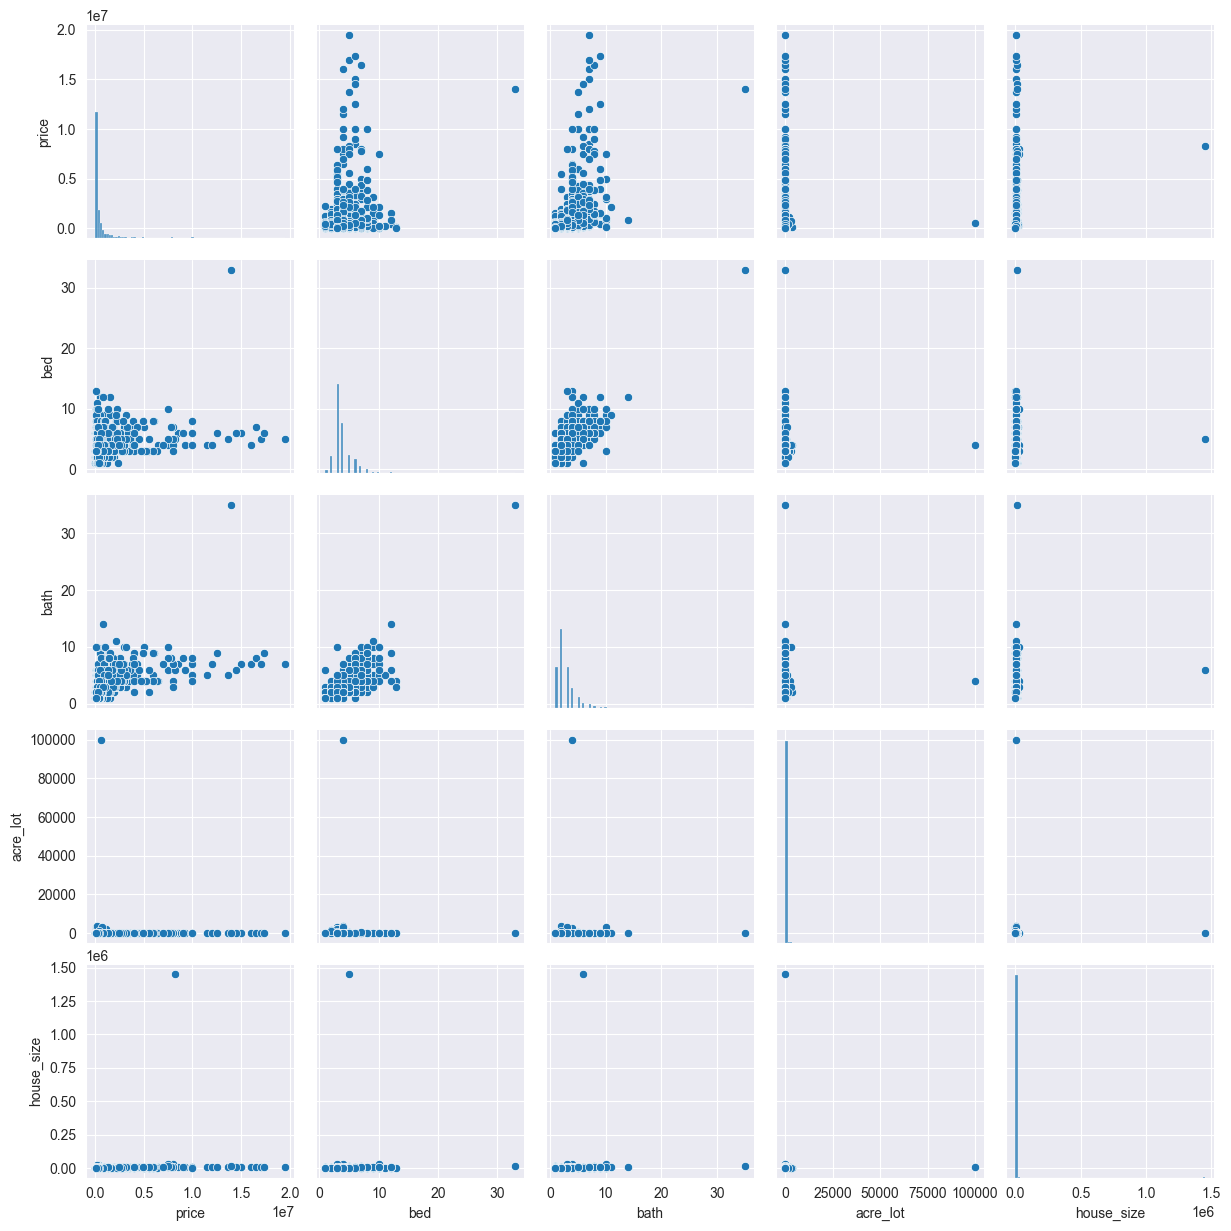

In [97]:
#To further our analysis lets plot some scatter plots
sns.pairplot(df[numeric_cols])
plt.show()

From the above we can see that even though there is a positive correlation between #bathrooms and bathrooms it is not a particularily accurate one. Even still it is the best one we have to work with unless we want to factor in location.

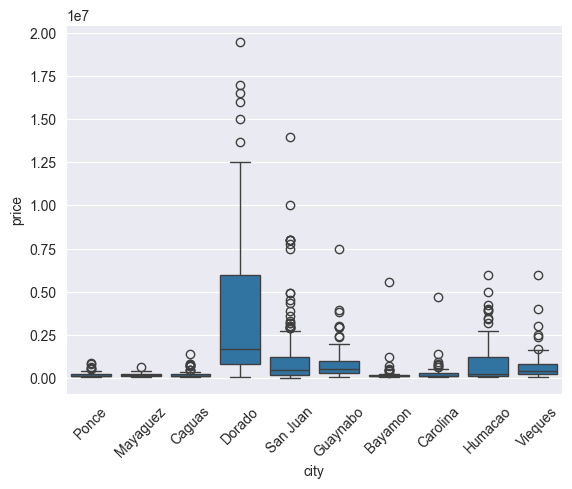

In [98]:
#Location plays a huge factor as well. Lets make a box plot of the top 10 cities based on price of real estate
top_cities = df['city'].value_counts().head(10).index
sns.boxplot(data=df[df['city'].isin(top_cities)], x='city', y='price')
plt.xticks(rotation=45)
plt.show()

We can see here that Dorado is by far the most expensive city. Excluding San Juan the rest of our cities have much lower priced real estate. This explains further why # of bathrooms only loosely correlates with price. We could filter our dataset down to include specific cities to get a more accurate model but lets try our linear regression for all of Puerto Rico to plot it loosely.

## Linear Regression

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
# Features and target
X = df[['bath']]
y = df['price']

In [101]:
#Split our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Visualize the Regression Line and Evaluate our Model


In [102]:
y_pred = regressor.predict(X_test)

In [103]:
#Evaluate the model
print("Coefficient (slope):", regressor.coef_[0])
print("Intercept:", regressor.intercept_)
# R² score
print("R² score:", r2_score(y_test, y_pred))
# Mean squared error
print("MSE:", mean_squared_error(y_test, y_pred))

Coefficient (slope): 475274.5083426078
Intercept: -678491.0068675814
R² score: 0.25982835710688124
MSE: 2680609950334.082


Based on our R squared score we can see that # of bathrooms explains about 25% of the variation in house prices overall. This is a fairly weak correlation but still a factor.

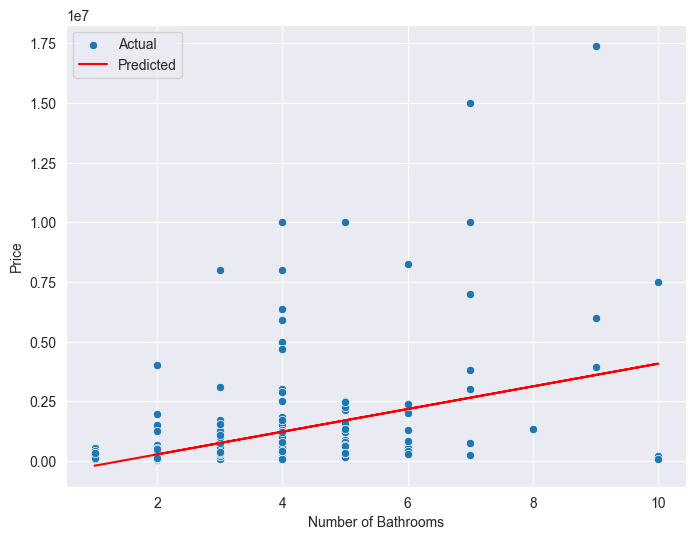

In [104]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['bath'],y=y_test,label='Actual')
plt.plot(X_test, y_pred, color="red", label='Predicted')
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.legend()
plt.show()

## Let's try polynomial regression to see if we can get a slightly better model.

In [105]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

#We will use the exact same train test split as before

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [106]:
y_pred = poly_model.predict(X_test)

#Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² score: {r2:.3f}")

R² score: 0.261


The R squared score is slightly better in this polynomial model than in the linear model.

## Plotting the Polynomial Regression

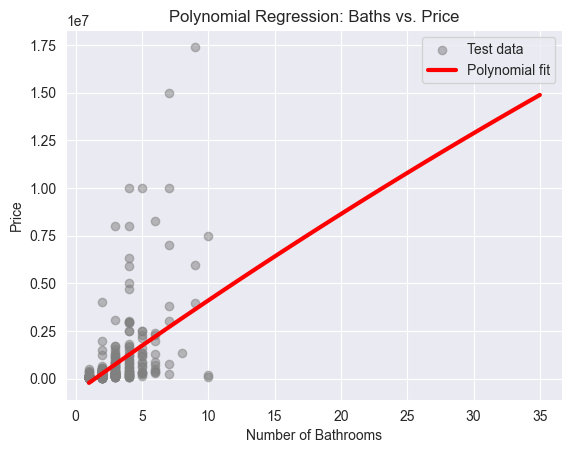

In [107]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

#Sort for smooth plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_plot = poly_model.predict(X_plot)

# Sort for smooth plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = poly_model.predict(X_plot)

plt.scatter(X_test, y_test, color='gray', alpha=0.5, label='Test data')
plt.plot(X_plot, y_plot, color='red', linewidth=3, label='Polynomial fit')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Polynomial Regression: Baths vs. Price')
plt.legend()
plt.show()

## Conclusion:
Without taking into account the specific city or neighborhood, predicting real estate prices in Puerto Rico is quite difficult. The most correlated variable with price, number of bathrooms, explains only about 26 percent of the variation in housing prices, which shows that other important factors are missing from the model. This suggests that the relationship between home features and price is not strong enough to make accurate predictions on its own. To improve the model, location data such as city, neighborhood, or zip code should be included since these often have a major influence on housing values. It would also be helpful to add other relevant variables like number of bedrooms, lot size, and house size to create a more complete and accurate model for predicting real estate prices in Puerto Rico.